<a href="https://colab.research.google.com/github/LestyMV/Clustered_data/blob/main/Clustered_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [39]:
# Step 1: Load the data into a Pandas DataFrame
import pandas as pd

df = pd.read_csv("clustered_data.csv",encoding="latin1")
df1 = df.drop(columns=['Number'])
df1


,a,b
0,0.296547,7.384751
1,3.964009,-5.564559
2,-2.476174,-0.459380
3,3.492251,6.246705
4,0.934710,9.289700
...,...,...
9995,1.987784,6.861829
9996,3.853792,-5.773285
9997,1.974643,8.453677
9998,-9.895919,3.115018


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: F

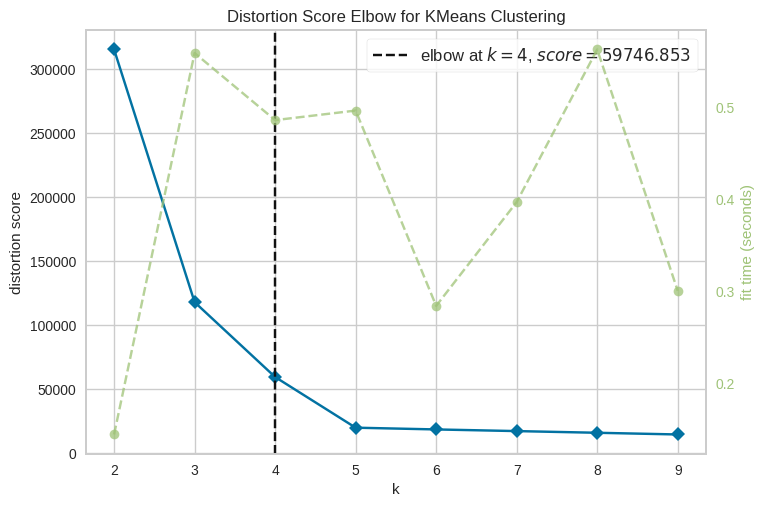

5


In [50]:
# Step 2: Determine the optimal number of clusters
import matplotlib.pyplot as plt
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans

visualizer = KElbowVisualizer(KMeans(), k=(2,10))
visualizer.fit(df1)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure
n_opt = visualizer.elbow_value_+1
print (n_opt)

In [55]:
# Step 3: Apply k-means clustering algorithm to the data

kmeans = KMeans(n_clusters=n_opt).fit(df1)
centroids = kmeans.cluster_centers_
print(centroids)

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


[[ 7.83586888  6.35430713]
 [-2.42022703  0.36598873]
 [ 3.10776414 -6.14708649]
 [-9.24997359  3.82599103]
 [ 1.75290997  7.96514556]]


The resulting scatterplot shows the clusters and their centroids in different colors, with the centroids marked in red. The KElbowVisualizer will help us determine the optimal number of clusters. We're using the elbow method, which looks for a bend (elbow) in the plot of the sum of squared distances between each point and its cluster centroid against the number of clusters.

In this case, we can see from the elbow plot that the optimal number of clusters is 5. This means that the data has five distinct clusters, and the k-means algorithm has successfully identified them.


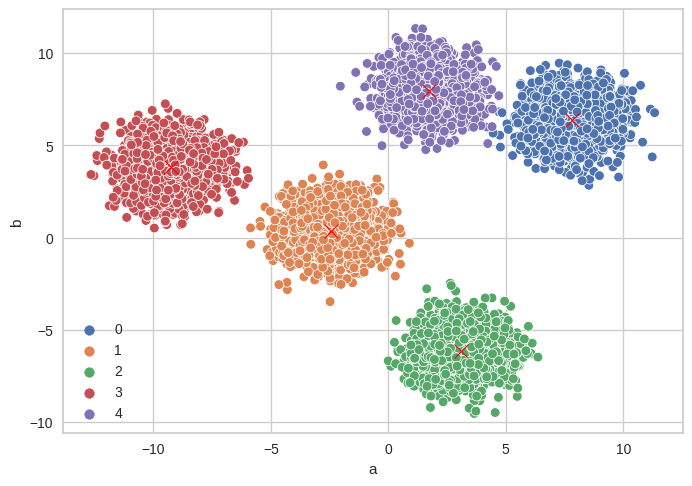

In [56]:
# Step 4: Visualize the clusters and their centroids using a scatterplot
import seaborn as sns

sns.scatterplot(data=df1, x="a", y="b", hue=kmeans.labels_, palette="deep")
sns.scatterplot(x=kmeans.cluster_centers_[:,0], y=kmeans.cluster_centers_[:,1], color='red', s=100, marker='x')
plt.show()